In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Task 10

In [94]:
A = np.array(
    [
        [13, 4, 3, 9],
        [-1, -8, 5, 0],
        [2, 3, 8, 1],
        [6, -2, 0, 4],
    ],
    dtype=np.float64    
)

In [95]:
# A = np.array([[1 / (i + j + 1) for j in range(4)] for i in range(4)])

In [96]:
def vhouse(x):
    x = x / np.linalg.norm(x)
    s = x[1:] @ x[1:]
    v = np.array([1, *x[1:]]) 
    if s < 1e-12:
        beta = 0
    else:
        if x[0] <= 0:
            v[0] = x[0] - 1
        else:
            v[0] = -s / (x[0] + 1)

        beta = 2 * (v[0] ** 2) / (s + v[0] ** 2)
        v /= v[0]

    return v, beta    

In [134]:
def householder_method(A):
    n = max(A.shape)
    Q = np.eye(n)
    H = A.copy()

    for k in range(n - 2):
        v, beta = vhouse(H[k + 1: , k])
        I = np.eye(k + 1)
        N = np.zeros((k + 1, n - k - 1))
        
        m = len(v)
        v = v.reshape(m, 1)

        # print('v', v)

        R = np.eye(m) - beta * v @ v.T
        H[k + 1:, k:] = R @ H[k + 1:, k:]
        H[:, k + 1: n] = H[:, k + 1: n] @ R
        P = np.block([[I, N], [N.T, R]])
        
        # print('k', k)
        # print('P', *P.round(2), sep='\n')

        Q = Q @ P

    return H, Q

In [135]:
import numpy as np
from numpy.linalg import norm
from numpy import eye


def vhouse(x, epsilon = 10e-12):
    y = norm(x)
    x /= y 
    
    s = x[1:]@x[1:]
    v = np.array([1, *x[1:]])
    #mu = sqrt(x0^2+s) so it is always one, we removed it from the code
    if s <= epsilon:
        beta = 0
    else:
        if x[0] <= 0:
            v[0] = x[0] - 1
        else:
            v[0] = - s/(x[0] + 1)
    
        beta = 2*(v[0]**2)/(s + v[0]**2)
        v /= v[0]

    return v, beta


def househess(A):
    n = max(A.shape)
    Q = eye(n)
    H = A.copy()
    for k in range(n - 2):
        v, beta = vhouse(H[k+1:,k])
        m = len(v)
        
        v = np.reshape(v, (m, 1))
        R = eye(m) - beta*v@v.T

        H[k+1:, k:]= R@H[k+1:,k:]
        H[:,k+1:] = H[:,k+1:]@R

        nm = n -m

        Q[nm:, nm:] = Q[nm:,nm:]@R
        Q[:nm, nm:] = Q[:nm,nm:]@R

    return H, Q

def househess_sym(A):
    n = max(A.shape)
    Q = eye(n)
    H = A.copy()
    for k in range(n - 2):
        v, beta = vhouse(H[k+1:,k])
        m = len(v)

        v = np.reshape(v, (m,1))
        R = eye(m) - beta*v@v.T

        # Save time by computing only one square block and a row
        H[k, k+1:] = H[k, k+1:]@R
        H[k+1:,k] = H[k, k+1:].T
        H[k+1:,k+1:] = R@H[k+1:,k+1:]@R

        nm = n -m

        Q[nm:, nm:] = Q[nm:,nm:]@R
        Q[:nm, nm:] = Q[:nm,nm:]@R


    return H, Q

In [136]:
H, Q = househess(A)
print('H', *H.round(2), sep='\n')
print('Q', *Q.round(2), sep='\n')

H
[13.    8.75  4.98 -2.16]
[ 1.    4.29  1.05 -0.08]
[ 0.    1.   -2.08  8.93]
[0.   0.   7.84 1.79]
Q
[1. 0. 0. 0.]
[ 0.   -0.16  0.91 -0.39]
[0.   0.31 0.42 0.85]
[ 0.    0.94  0.01 -0.35]


In [137]:
H, Q = householder_method(A)
print('H', *H.round(2), sep='\n')
print('Q', *Q.round(2), sep='\n')

H
[13.    8.75  4.98 -2.16]
[ 1.    4.29  1.05 -0.08]
[ 0.    1.   -2.08  8.93]
[0.   0.   7.84 1.79]
Q
[1. 0. 0. 0.]
[ 0.   -0.16  0.91 -0.39]
[0.   0.31 0.42 0.85]
[ 0.    0.94  0.01 -0.35]


In [138]:
scipy.linalg.hessenberg(A).round(2)

array([[13.  ,  8.75, -4.98,  2.16],
       [ 6.4 ,  4.29, -1.05,  0.08],
       [ 0.  , -3.84, -2.08,  8.93],
       [ 0.  ,  0.  ,  7.84,  1.79]])

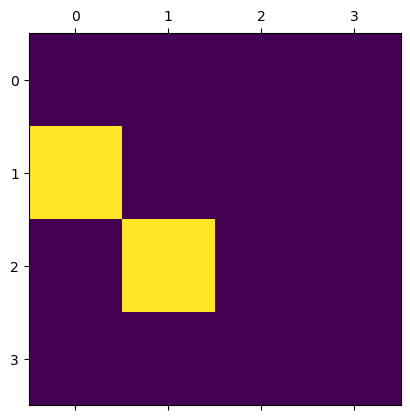

In [139]:
plt.matshow(np.abs(Q.T @ A @ Q - H) > 1e-10)
plt.show()

In [140]:
A = np.array(
    [
        [4, 3, 2, 1],
        [3, 4, 3, 2],
        [2, 3, 4, 3],
        [1, 2, 3, 4],
    ],
    dtype=np.float64
)

In [141]:
H, Q = householder_method(A)
print('H', *H.round(2), sep='\n')
print('Q', *Q.round(2), sep='\n')

H
[4.   3.74 0.   0.  ]
[1.   8.29 2.6  0.  ]
[0.   1.   3.04 0.23]
[0.   0.   0.23 0.67]
Q
[1. 0. 0. 0.]
[ 0.    0.8  -0.5   0.33]
[ 0.    0.53  0.35 -0.77]
[0.   0.27 0.79 0.55]


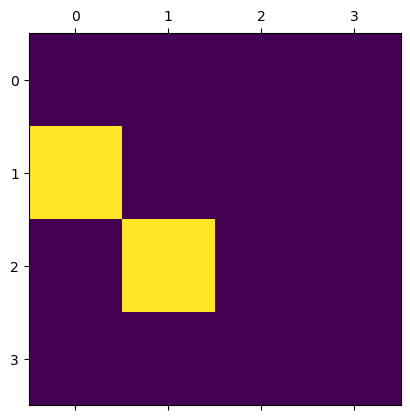

In [142]:
plt.matshow(np.abs(Q.T @ A @ Q - H) > 1e-10)
plt.show()

# Task 11

In [143]:
def givcos(xi, xk, eps=1e-12):
    if (np.abs(xk) < eps):
        c = 1
        s = 0
    else:
        if np.abs(xk) > np.abs(xi):
            t = -xi / xk
            s = 1 / np.sqrt(1 + t ** 2)
            c = s * t
        else:
            t = -xk / xi 
            c = 1 / np.sqrt(1 + t ** 2)
            s = c * t
    
    return c, s

In [144]:
def garrow(M, c, s, j1, j2, i, k):
    for j in range(j1, j2 + 1):
        t1 = M[j, i]
        t2 = M[j, k]
        M[j, i] = c * t1 - s * t2
        M[j, k] = s * t1 + c * t2
    
    return M

In [145]:
def gacol(M, c, s, j1, j2, i, k):
    for j in range(j1, j2 + 1):
        t1 = M[j, i]
        t2 = M[j, k]
        M[j, i] = c * t1 - s * t2
        M[j, k] = s * t1 + c * t2
    
    return M

In [146]:
def progdiv(c, s, n):
    n1 = n - 1
    n2 = n - 2
    Q = np.eye(n)
    Q[n1 - 1, n1 - 1] = c[n1 - 1]
    Q[n - 1, n - 1] = c[n1 - 1]
    Q[n1 - 1, n - 1] = s[n1 - 1]
    Q[n - 1, n1 - 1] = -s[n1 - 1]

    for k in range(n2 + 1, 0, -1):
        k1 = k + 1
        Q[k - 1, k - 1] = c[k - 1]
        Q[k1 - 1, k - 1] = -s[k - 1]
        q = Q[k1 - 1, k1 - 1:]
        Q[k - 1, k1 - 1:] = s[k - 1] * q
        Q[k1 - 1, k1 - 1:] = c[k - 1] * 1

    return Q

In [147]:
def qrgivens(H):
    m, n = H.shape
    c = np.zeros(n - 1)
    s = np.zeros(n - 1)

    for k in range(n - 2):
        c[k], s[k] = givcos(H[k, k], H[k + 1, k])
        H = garrow(H, c[k], s[k], k, k + 1, k, n - 1)
    
    R = H.copy()
    Q = progdiv(c, s, n)

    return Q, R, c, s

def hessqr(A, n_iter):
    T, Q = householder_method(A)
    n = max(A.shape)

    for j in range(n_iter):
        Q, R, c, s = qrgivens(T)
        T = R.copy()

        for k in range(n - 1):
            T = gacol(T, c[k], s[k], 0, k + 1, k, k + 1)

    return T, Q, R

In [149]:
T, Q, R = hessqr(A, 10)

In [150]:
print(*T.round(2), sep='\n')
print(*Q.round(2), sep='\n')
print(*R.round(2), sep='\n')

[ 0.  0. -0.  0.]
[-1.3 -0.   0.   0. ]
[ 0.  0.  0. -0.]
[0. 0. 0. 0.]
[-0.    0.96 -0.   -0.  ]
[-1. -0. -0. -0.]
[0.   0.26 0.96 0.96]
[ 0.  0. -0.  0.]
[-0. -0.  0.  0.]
[-0.    1.3   0.    4.77]
[ 0.  0.  0. -0.]
[0. 0. 0. 0.]
